In [8]:
%%html
<!-- RTL Fix the jupyter notebook 7  -->
<style>
    .jp-RenderedHTMLCommon {
        padding-top: 2em !important;
  }   
    .jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon * {
        direction: rtl !important;
        text-align:right !important;
  }
    .jp-MarkdownCell .jp-InputArea-editor {
        direction: rtl !important; 
        text-align:right !important;
        padding-top: 2em !important;
  } 

 .jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span {
        text-align:left !important;
        direction: ltr !important;
        unicode-bidi: embed !important;

    }
    .jp-RenderedHTMLCommon pre:has(code) {
      direction: ltr !important;
      text-align: left!important;
    }

</style> 

In [12]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

# שבוע 6 - מבני נתונים וקבצים

## רשומות ומילונים

## רשומה `tuple`: "רשימה" בלתי ניתנת לשינוי

- `tuple` היא מבנה נתונים הדומה ל־`list`, אך הוא בלתי־ניתן לשינוי (immutable).

In [ ]:
t = ("don't", "worry", "be", "happy") # definition

In [ ]:
 t[0] # indexing

In [ ]:
t[-1] # backwords indexing

In [ ]:
t[1:3] 	# slicing

In [ ]:
my_list = [1, 2, 3]
my_tuple = (1, 2, 3)
my_tuple[0:2] 

In [ ]:
my_tuple[1] = 10

<span style='color:red'> אין אפשרות לקרוא לשום מתודה שראינו בlist שמשנה את הערך המקורי כמו append, remove וכו' </span>

# מילונים: `dict`: "רשימה" עם מפתחות במקום אינדקסים

- מבנה נתונים אסוציאטיבי  
    - התאמה בין מפתח לערך (Key – Value)  
    - גישה לערכים לפי מפתח (ולא לפי מיקום כמו ברשימות)  
    - אין הבטחה לסדר של האיברים  
    - מהיר מאוד!  
  
- אינטואיציה - דפי זהב:  
    - אם יש לך שם, קל למצוא את מספר הטלפון המתאים  
    - אם יש לך מספר טלפון, קשה להתאים לו שם  

   
- המפתחות צריכים להיות:  
    - ייחודיים  
    - בלתי ניתנים לשינוי (immutable)
 
תחביר:  
```python
{key1:val1, key2:val2,…}
```


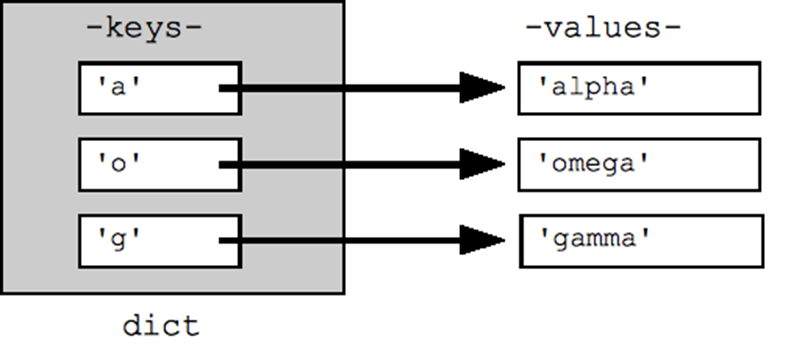

### דוגמא

In [ ]:
phonebook = {'Eric Cartman': '2021', 'Stan March': '5711', 'Kyle Broflovski': '2781'}
print(phonebook)

- הערה: באופן כללי, זוגות המפתח-ערך במילון לא בהכרח יוצגו באותו סדר שבו הוגדרו.  
  מילונים לא מבטיחים סדר מסוים של מפתחות.  
- החל מ-Python 3.7, הסדר של המילון מובטח להיות לפי סדר ההכנסה,  
  אך לא מומלץ להסתמך על כך משום שזה תלוי בגרסה/שפה.


- גישה לפי מפתח:

In [ ]:
phonebook['Eric Cartman']

- בדיקה אם מפתח קיים:

In [ ]:
'Kenny McCormick' in phonebook

- הוספה:

In [ ]:
phonebook['Kenny McCormick'] = '1234'
print(phonebook)

מה קורה כאשר מוסיפים מפתח שכבר קיים?

In [ ]:
print(phonebook)
phonebook['Kenny McCormick'] = '2222'
print(phonebook)

איך נוכל להוסיף עוד כניסה עבור Kenny McCormick בפנקס הטלפונים?

רעיון: להוסיף כתובת למפתח

In [ ]:
phonebook= {['Kenny McCormick', 'Southpark']: '2222'}

מה הבעיה?

- <span style='color:red'> מפתחות חייבים להיות בלתי ניתנים לשינוי (immutable)! </span>  
- מה אפשר לעשות?

תיקון: השתמשו ב־tuples בתור מפתחות!

In [ ]:
phonebook= {('Kenny McCormick', 'Southpark'): '2222'}
print(phonebook) 

### Dictionary methods

| פונקציה            | תיאור                                                                 |
|---------------------|------------------------------------------------------------------------|
| `D = {}`            | יוצר מילון ריק                                                         |
| `D[k] = value`      | קובע את הערך של `D[k]`                                                 |
| `k in D`            | מחזיר `True` אם `k` הוא מפתח במילון, אחרת `False`                    |
| `D[k]`              | מחזיר את הערך של המפתח `k` (יזרוק KeyError אם `k` לא קיים)           |
| `D.get(k, [d])`     | מחזיר את `D[k]` אם קיים, אחרת את `d` (ברירת מחדל: `None`)             |
| `D.keys()`          | מחזיר תצוגה של כל המפתחות במילון                                     |
| `D.values()`        | מחזיר תצוגה של כל הערכים במילון                                      |
| `D.items()`         | מחזיר תצוגה של זוגות `(מפתח, ערך)` כ־tuples                          |
| `D.pop(k, [d])`     | מסיר את המפתח `k` ומחזיר את ערכו; אם לא נמצא מחזיר `d` או שגיאה       |
| `D.copy()`          | יוצר העתק רדוד של המילון (המילון בלבד מועתק, לא האובייקטים שבתוכו)   |
| `D.update(other)`   | מוסיף את כל הפריטים מהמילון `other` לתוך `D`                         |


- ארגומנט שמסומן כ־<span style="color:red"><i>[d]</i></span> הוא אופציונלי  
    - אם לא מציינים אותו, ייעשה שימוש בערך ברירת המחדל  
- מידע נוסף על מתודות של מילון נמצא [כאן](https://docs.python.org/3/library/stdtypes.html#dict)


### תצוגות מילון (Dictionary Views)

- המתודות של מילון `keys()`, `values()`, `items()` מחזירות תצוגה איטרבילית דינמית.  
- החל מ-Python 3.7, סדר התצוגה של המילון נשמר לפי סדר ההכנסה, אבל לא כדאי להסתמך על כך.  
- ניתן לאחזר תצוגה בלולאה, לבדוק שייכות עם `in`, והיא משתנה דינמית כאשר המילון משתנה.  
- התצוגה משתנה כאשר המילון משתנה  
    - <span style='color:red'>לא לשנות את המילון תוך כדי איטרציה על אחת מהתצוגות שלו</span>


In [ ]:
d={'A':65, 'B':66, 'C':67}
print(d)
print(d.keys())
print(d.values())
print(d.items())
a=list(d.items())


In [ ]:
a=d.keys()
print(a)
d['D']=68
d['E']=69
print(a)
print('E' in a)

## דוגמה: מונה תדירות תווים

- מטרה: לספור את התדירות של כל אות במחרוזת


In [ ]:
def get_char_count(text):
    char_count = {}
    for char in text:
        if not char in char_count:
            char_count[char] = 1
        else: 
            char_count[char] += 1
    return char_count

In [ ]:
text = 'jerry'
get_char_count(text)

In [ ]:
text = 'supercalifragilisticexpialidocious'
get_char_count(text)

### מונה תדירות תווים משופר

- שימוש ב-`get()`:


In [ ]:
def get_char_count(text):
    char_count={}
    for char in text:
        char_count[char] = char_count.get(char, 0) + 1
    return char_count

text = 'jerry'
get_char_count(text)

### מונה תדירות תווים: הדפסת תוצאה ממוינת

באיזה סדר נדפיס את התווים?

**אפשרות ראשונה - לפי סדר אלפביתי**: תחילה את מספר המופעים של a, לאחר מכן את מספר המופעים של b וכו'

In [ ]:
def print_by_keys_order(d):
    sorted_chars = sorted(d)
    for char in sorted_chars:  
        print(char, ':', d[char])

text = 'supercalifragilisticexpialidocious'
cc = get_char_count(text)
print_by_keys_order(cc)

- **אפשרות שניה - לפי תדירות:** להתחיל מהאות שמופיעה הכי הרבה פעמים ולסיים בזו שמופיעה הכי מעט


In [ ]:
def print_by_keys_order(d):
    sorted_chars = sorted(d, key=d.get, reverse=True)
    for char in sorted_chars: 
        print(char, ':', d[char])

text = 'supercalifragilisticexpialidocious'
cc = get_char_count(text)
print_by_keys_order(cc)

----

# רשימות חלק ב'

### יצירת רשימות בשורה אחת: List Comprehension

- דרך פייתונית ליצירת רשימות.
- שילוב של רשימות ולולאות for.
- תחביר:
    - `[expression for item in list]`
- אפשר גם לכתוב:
    - `[expression for item in list if condition]`


### יצירת רשימות בשורה אחת: דוגמא

במקום

In [ ]:
my_list = []
for i in range(10):
    my_list.append(i*i)
my_list

ניתן לכתוב כך:

In [ ]:
[i**2 for i in range(10)]

### דוגמאות נוספות

In [ ]:
l = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

In [ ]:
[word.upper() for word in l]

In [ ]:
[word for word in l if len(word) < 4]

In [ ]:
[i ** 2 if i % 3 == 0 else i ** 3 for i in range(2, 13) if i % 6 != 0]

----

In [ ]:
%%html
<style>
table {display: inline-block}
td {text-align:left}
.consoleMachineFont {color:blue;font-family:Courier}
.consoleUserFont {font-family:Courier}
</style>

## קבצים

## פורמט מחרוזות

### עריכת מחרוזות לפני פורמט: String Formatting
השתמשו ב- `str.format()` או בתחביר `f""`/`f''` כדי להגדיר רפורמט של מחרוזת

In [ ]:
name = 'rick'
pi = 3.14159265359

# print("My name is {0} and I like {1}".format(name, pi))
# print("My name is {} and I like {}".format(name, pi))
print(f"My name is {name} and I like {pi}")

### בהדפסות, לרוב נרצה להציג את המספרים בצורה קריאה יותר

- עיגול מספרים עם הרבה ספרות אחרי הנקודה העשרונית
- תצוגה מספרית שונה  
    לדוגמה, מדעי: 1.3e-7 במקום 0.000000137


<code><span style='color:red'>:</span><span style='color:blue'>.d</span><span style='color:green'>S</span></code> - עיגול מספרים ותצוגת מספרים (`int`/`float`)  
- <code><span style='color:red'>:</span></code> מציין היכן מתחילה עריכת התצוגה  
- <code><span style='color:blue'>.d</span></code> רמת הדיוק — כמה ספרות אחרי הנקודה העשרונית  
- <code><span style='color:green'>S</span></code> סגנון מספרי (נקודה עשרונית, אחוזים, מדעי וכו')


In [ ]:
# print("My name is {0} and I like {1:.2f}".format(name, pi))
# print("My name is {} and I like {:.2e}".format(name, pi))
print(f"My name is {name} and I like {0.00137:.1e}")

מידע נוסף: https://docs.python.org/3/library/string.html#format-examples


----

In [ ]:
%%html
<style>
table {display: inline-block}
td {text-align:left}
.consoleMachineFont {color:blue;font-family:Courier}
.consoleUserFont {font-family:Courier}
</style>

## קריאה וכתיבה מקבצים

## קבצים ותיקיות

- **קובץ במחשב** הוא משאב לאחסון מידע — "מסמך" דיגיטלי

- קבצים מאורגנים ב**תיקיות** (directories)

- לכל קובץ יש כתובת (path) במערכת הקבצים של המחשב  
   - לדוגמה: `C:\Desktop\lecture_4


ile.txt`

- הסיומת של הקובץ (extension) מסמלת את סוג התוכן (txt, exe, mp3, avi, jpg)  
   - קבצי טקסט מורכבים מרצף תווים  
   - קבצים בינאריים מכילים רצף בתים (bytes) שיכולים לייצג כל מידע שהוא (לא בהכרח טקסט)

## מבנה היררכי של מערכת הקבצים

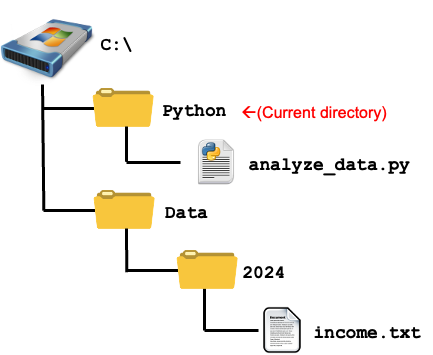

על מנת לגשות לקובץ `income.txt` מהקוד בבקובץ `analyze_data/py` ניתן להשתמש בנתיבים הבאים:

**נתיב מלא (Absolute path)**: 
- `C:\Data\2024\income.txt`

**נתיב יחסי (Relative path):**
- `..\Data\2024\income.txt`

## Text files

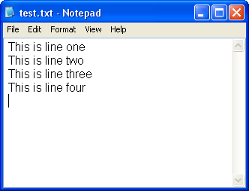

- קבצי טקסט מורכבים מ**שורות**

- כל שורה היא מחרוזת, כלומר **רצף תווים**

- התו האחרון בכל שורה הוא התו המיוחד (escape character) ירידת שורה (`\n`).
    - תזכורת: רצף תוים (בד"כ 2) המתחילים בקו אלכסוני הפוך -`\` - נקראים גם **escape characters**, והם נועדו לסמן תווים שלא ניתן להקיש במקלדת באופן פשוט
    - בד"כ לא נראה תווים הללו זה בעורכי טקסט סטנדרטיים, אלא את התווים שהם אמורים לייצ.
    - לדוגמא, במקום `\n` נראה ירידת שורה


## פתיחת חיבור לקובץ

- הפונקציה `open()` מחזירה אובייקט קובץ

- לרוב משתמשים בה עם שני ארגומנטים:
```python
open(filename, mode)
```
   - `filename`: כתובת של הקובץ (path)
   - `mode`:
      * `'r'` - קריאה
      * `'w'` - כתיבה (מוחק נתונים קודמים)
      * `'a'` - הוספה (לסוף הקובץ הקיים)

## קריאת קובץ שלם

In [ ]:
with open('test_file.txt', 'w') as f:
    f.write('This is a file')

In [ ]:
f = open('test_file.txt', 'r') # returns a file object
s = f.read() # reads the entire file
print(s)
f.close() # releases the file lock, frees resources

אם הקובץ נמצא בתיקייה אחרת – השתמשו בכתובת מלאה. לדוגמה:  

```python
f = open('C:\Users\Desktop\test_file.txt', 'r')
```

#### <span style="color:red">שימו לב לתו המיוחד `\t`</span>


In [ ]:
f = open('test_file.txt', 'r') # running this instead of full path as it does not support Unix systems

## המנעו משימוש בקו אלכסוני הפוך (`\`) בשם הקובץ

מכיוון בקו אכלסוני הפוך נועד כדי לייצג תווים מיוחדים (escape characters), יש להמנע משימוש נאיבי בתו כזה בשם הקובץ. שימוש כזה יגרום ליצירת נתיב קובץ לא צפוי. לדוגמא:

In [5]:
print("C:\Users\Desktop\test_file.txt")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (534476123.py, line 1)

כאלטרנטיבה, ניתן לייצג קווים נוטים בנתיבי הקבצים בצורות הבאות:
- `'C:/Users/Desktop/test_file.txt'`
- `'C:\\Users\\Desktop\\test_file.txt'`


In [4]:
print('C:\\Users\\Desktop\\test_file.txt')
print('C:/Users/Desktop/test_file.txt')

C:\Users\Desktop\test_file.txt
C:/Users/Desktop/test_file.txt


## קריאה שורה לאחר שורה

- ניתן לעבור שורה-שורה באמצעות לולאת `for`

In [ ]:
with open('test_file_multi_line.txt', 'w') as f:
    f.write('This is line1\nThis is line 2\nThe end')

In [ ]:
f = open('test_file_multi_line.txt', 'r')
for line in f:
    print(line, end='')
f.close()

- לחלופין, ניתן להשתמש ב- `readlines()` כדי לקבל רשימה של שורות

In [ ]:
f = open('test_file_multi_line.txt', 'r')
lines = []
for line in f:
    lines.append(line)
f.close() 

# or use readlines()
f = open('test_file_multi_line.txt', 'r')
lines = f.readlines()
f.close()

## ארבע דרכים נפוצות לקריאה מקובץ

1. `f.read()` – קורא את כל הקובץ כמחרוזת אחת
2. `f.readline()` – קורא את השורה הבאה (יחסית למיקום הנוכחי)
3. `f.readlines()` – מחזיר רשימה של כל השורות שנותרו
4. לולאת `for`:
```python
for line in f:
    ...
```

## הערות

- כל פעולת קריאה מקדמת את "הסמן" (cursor) בקובץ
    - לדוגמא, קריאת שורה אחת תקדם את הסמן לשורה הבאה 

- כדי להתחיל מההתחלה, צריך לפתוח את הקובץ מחדש  

- יש לזכור לסגור את הקובץ עם `f.close()`  

- בסוף כל שורה מופיע `\n` — תו ירידת שורה
    - בעת קריאת השורות, אנו בד"כ נרצה להסיר תוים אלו 

In [ ]:
a_line = 'This is a line\nSecond line' 
print(a_line)

## פירוק מחרוזת לתתי מחרוזות – `split()`

- **Parsing** – ניתוח טקסט לפסוקים לפי פורמט מוסכם מראש

- `split()` מפרק מחרוזת לרשימת תתי-מחרוזות לפי תו מפריד

In [ ]:
s = "topeka, kansas city,wichita,,olathe"

cities = s.split(',') 
# If a delimiter is not specified, the string is split to words separated by a sequence of whitespaces.

for city in cities:
     print(city)

## ניקוי תווים מיותרים – `strip()`, `rstrip()`, `lstrip()`

- `strip()` – מסיר תווים מיותרים משני הצדדים

In [ ]:
'   spacious   '.strip()

In [ ]:
'www.example.com'.strip('comwz.')

- `rstrip()` – מסיר רק מהצד הימני

In [ ]:
lines = ['this is line 1\n', 'this is line 2\n', 'the end']
for i in range(len(lines)):
    lines[i] = lines[i].rstrip()
print(lines)

- מה עושה הפונקציה `lstrip()`?

### תרגיל: הדפסת שכיחות מילים

- מטרה: הדפיסו המילים הקובץ `input.txt` לפי שכיחות יורדת

- תחילה ניצור קובץ כזה:

In [ ]:
with open("input.txt", "w") as input_file:
    line = ["a"] * 20 + ["and"] * 10 + ["where"] * 5
    input_file.write(" ".join(line))

- פתרון

In [ ]:
f = open("input.txt", "r")
d = {}
for line in f:
    for word in line.split():
        d[word] = d.get(word, 0) + 1
f.close()

for w in sorted(d, key=d.get):
     print(w + ":", d[w])


## כתיבת מחרוזות לקובץ

- השתמשו ב- `f.write(str)` כדי לכתוב לקובץ

In [ ]:
# open a file (or create it if no such file exists)
f = open('test_file_3.txt', 'w')
f.write("This is a test")
# newline
f.write('\n')

# to write a non-string object, first convert to string
tpl = ('string', 40)
f.write(str(tpl))

# flush data to the file and close it, unlock file, free resources
f.close()

In [ ]:
f = open('test_file_3.txt', 'r')
print(f.read())
f.close()

## דוגמה: כתיבת רשימת מספרים לקובץ טקסט

In [ ]:
my_list = [i**2 for i in range(1,11)] 
#  List comprehension !
# Generates a list of squares of the numbers 1 – 10

In [ ]:
f = open("output.txt", "w")

for item in my_list:
    f.write(str(item) + "\n")

f.close()

# now let's view the output file
f = open('output.txt', 'r')
print(f.read())
f.close()


## שימוש ב-context manager

- במקום `close()` אפשר להשתמש ב-`with`

In [ ]:
# replace this code:
f = open('test_file_multi_line.txt', 'r')
content = f.read()
f.close()

In [ ]:
# with this:
with open('test_file_multi_line.txt', 'r') as f:
    content = f.read()
    
# close is automatically called afterwards

## דוגמאות מסכמות

מה עושה קטע הקוד הבא?

In [ ]:
fname = 'test_file_multi_line.txt'

f = open(fname, 'r') 
lines = f.readlines() 
f.close() 

- המשתנה `lines` מכיל רשימת מחרוזות
- כל שורה מ`fname` היא מחרוזת מהרשימה `lines`

In [ ]:
f = open(fname, 'r')
firstline = f.readline()
secondline = f.readline()
f.close()

- המשתנה `firstline` (מסוג מחרוזת) מכיל את השורה הראשונה מ`fname`
- המשתנה `secondline` מכיל את השורה השניה מ`fname`

In [ ]:
f = open(fname, 'r') 
for l in f: 
    print(l.split()[1])
f.close()

קודה מדפיס את המילה השניה מכל שורה

In [ ]:
outfname = 'myoutput.txt'
outf = open(outfname, 'w')
outf.write('My very own file\n')
outf.close()

הקוד כותב קובץ חדש/דורס קובץ קיים בשם myoutput.txt עם השורה בודדת "My very own file"